# TP6 : Apprentissage de la fonction XOR par un réseau à 1 couche cachée

### Chargement des librairies

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

Chargement des données

In [4]:
# ensemble d'apprentissage du XOR : [1,1] ou [0,0] -> 0, [0,1] ou [1,0] -> 1
# XOR = ou exclusif (soit l'un, soit l'autre)
data = [[1,1,0], [0,0,0], [0,1,1],[1,0,1]] 
  
# Création du dataframe
XOR = pd.DataFrame(data, columns = ['X1', 'X2', 'Y']) 

Définition des entrées X et sortie Y

In [5]:
X=XOR.drop(['Y'],axis=1)
Y=XOR['Y']
n=len(X)
d=len(X.iloc[1])

### Réseau à 1 couche cachée de 2 neurones
On tente d'approximer $X\mapsto Y$ par 
$\sigma\left(b+\begin{pmatrix}w_1&w_2\end{pmatrix}\cdot \sigma\left(\begin{pmatrix}b_1\\b_2\end{pmatrix}+\begin{pmatrix}w_{11}&w_{12}\\w_{21}&w_{22}\end{pmatrix}\cdot\begin{pmatrix}x_1\\x_2\end{pmatrix}\right)\right)$

In [18]:
from sklearn.neural_network import MLPClassifier
algo = MLPClassifier(\
    activation='logistic',\
    solver='lbfgs',\
    shuffle=True,\
    hidden_layer_sizes=(2,),\
    max_iter=1000,\
    tol=1e-12)
algo.fit(X,Y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=1000,
              solver='lbfgs', tol=1e-12)

In [19]:
print('[b1,b2],[b] :\n ',algo.intercepts_,'\n[[w11,w21],[w12,w22]],[w1,w2] :\n ',algo.coefs_,'\nScore : ',algo.score(X,Y))

[b1,b2],[b] :
  [array([-9.91033227,  2.80079408]), array([7.22081715])] 
[[w11,w21],[w12,w22]],[w1,w2] :
  [array([[ 6.35629238, -6.35641978],
       [ 6.35552895, -6.35689507]]), array([[-14.46536572],
       [-14.46571726]])] 
Score :  1.0


In [20]:
for i in range(n):
    print('[',X.iloc[i][0],',',X.iloc[i][1],']','->',algo.predict([X.iloc[i]])[0],'... on aimerait :',Y.iloc[i])

[ 1 , 1 ] -> 0 ... on aimerait : 0
[ 0 , 0 ] -> 0 ... on aimerait : 0
[ 0 , 1 ] -> 1 ... on aimerait : 1
[ 1 , 0 ] -> 1 ... on aimerait : 1


Probabilités

predict_probas donne la probabilité d'être de la première classe (O) et la probabilité d'être de la deuxième classe (1)

In [21]:
for i in range(n):
    print('[',X.iloc[i][0],',',X.iloc[i][1],']','->',algo.predict_proba([X.iloc[i]])[0],'... Classe :',Y.iloc[i])

[ 1 , 1 ] -> [0.99836946 0.00163054] ... Classe : 0
[ 0 , 0 ] -> [0.99836912 0.00163088] ... Classe : 0
[ 0 , 1 ] -> [0.00163047 0.99836953] ... Classe : 1
[ 1 , 0 ] -> [0.00163125 0.99836875] ... Classe : 1


In [22]:
def courbes_de_niveaux(fct, x1_min=-5, x2_min=-5, x1_max=5, x2_max=5):
    x1_values = np.linspace(x1_min, x1_max,100)
    x2_values = np.linspace(x2_min, x2_max,100)
    fct_values = np.array([[fct(x1,x2) for x1 in x1_values] for x2 in x2_values])    
    plt.contour(x1_values, x2_values, fct_values, 40)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.colorbar()

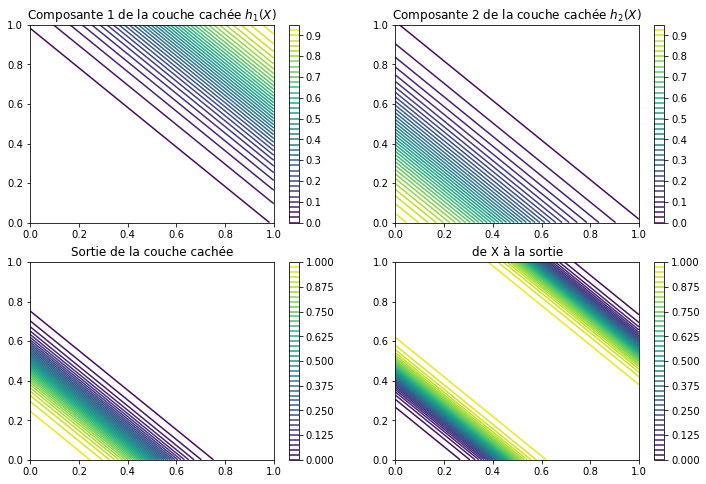

In [23]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def H1(x1,x2):
    return sigmoid(algo.intercepts_[0][0]+algo.coefs_[0][0][0]*x1+algo.coefs_[0][1][0]*x2)
def H2(x1,x2):
    return sigmoid(algo.intercepts_[0][1]+algo.coefs_[0][0][1]*x1+algo.coefs_[0][1][1]*x2)
def R(h1,h2):
    return sigmoid(algo.intercepts_[1][0]+algo.coefs_[1][0][0]*h1+algo.coefs_[1][1][0]*h2)
def XtoR(x1,x2):
    return R(H1(x1,x2),H2(x1,x2)) 
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title("Composante 1 de la couche cachée $h_1(X)$")
courbes_de_niveaux(H1,0,0,1,1)
plt.subplot(2,2,2)
plt.title("Composante 2 de la couche cachée $h_2(X)$")
courbes_de_niveaux(H2,0,0,1,1)
plt.subplot(2,2,3)
plt.title("Sortie de la couche cachée")
courbes_de_niveaux(R,0,0,1,1)
plt.subplot(2,2,4)
plt.title("de X à la sortie")
courbes_de_niveaux(XtoR,0,0,1,1)

Autres tentatives :

In [24]:
B1=[ 1,-1]
B2=[1]
V1=[[-10,10],[-10,10]]
V2=[[-20],[20]]
for i in range(n):
    print('[',X.iloc[i][0],',',X.iloc[i][1],']','->',sigmoid(B2[0]\
                                                             +V2[0][0]*sigmoid(B1[0]+V1[0][0]*X.iloc[i][0]+V1[0][1]*X.iloc[i][1])\
                                                             +V2[1][0]*sigmoid(B1[1]+V1[1][0]*X.iloc[i][0]+V1[1][1]*X.iloc[i][1]))\
          ,'...on aimerait :',Y.iloc[i])

[ 1 , 1 ] -> 0.0002631973630932956 ...on aimerait : 0
[ 0 , 0 ] -> 0.0002631973630932956 ...on aimerait : 0
[ 0 , 1 ] -> 0.7306388288867955 ...on aimerait : 1
[ 1 , 0 ] -> 0.730638828886796 ...on aimerait : 1


Représentation graphique

<function matplotlib.pyplot.show(*args, **kw)>

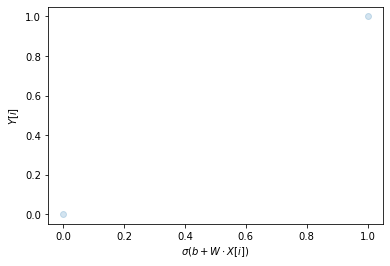

In [25]:
plt.scatter([algo.predict([X.iloc[i]])[0]+0*np.random.randn(1)/10 for i in range(n)]\
            ,[Y.iloc[i]+0*np.random.randn(1)/10 for i in range(n)]\
            ,alpha=0.1)
plt.xlabel('$\sigma(b+W\cdot X[i])$')
plt.ylabel('$Y[i]$')
plt.show

In [26]:
maskv1=[Y.iloc[i]==1 for i in range(n)]
maskv0=[Y.iloc[i]==0 for i in range(n)]

# Prédictions
maskp1=[algo.predict([X.iloc[i]])[0]>0.5 for i in range(n)]
maskp0=[algo.predict([X.iloc[i]])[0]<=0.5 for i in range(n)]

# Erreurs
# Y=1 mais sigma(b+XW)<0.5 (Faux négatifs)
maske1=[(maskv1[i]==True and maskp1[i]==False) for i in range(len(maskv1))]
# Y=0 mais sigma(b+XW)>0.5 (Faux positifs)
maske0=[(maskv0[i]==True and maskp0[i]==False) for i in range(len(maskv0))]
# Y=1 et sigma(b+XW)>0.5 (Vrais positifs)
maskok1=[(maskv1[i]==True and maskp1[i]==True) for i in range(len(maskv1))]
# Y=0 et sigma(b+XW)<0.5 (Vrais négatifs)
maskok0=[(maskv0[i]==True and maskp0[i]==True) for i in range(len(maskv0))]
print("Erreur moyenne :",(np.count_nonzero(maske0)+np.count_nonzero(maske1))/n\
     ,'(score : ',1-(np.count_nonzero(maske0)+np.count_nonzero(maske1))/n,')'\
     ,'\n Vrai positifs :',np.count_nonzero(maskok1)
     ,'\n Faux positifs :',np.count_nonzero(maske0)\
     ,'\n Vrai négatifs :',np.count_nonzero(maskok0)\
     ,'\n Faux négatifs :',np.count_nonzero(maske1))

Erreur moyenne : 0.0 (score :  1.0 ) 
 Vrai positifs : 2 
 Faux positifs : 0 
 Vrai négatifs : 2 
 Faux négatifs : 0
